In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Load dataset
df = sns.load_dataset("titanic")

#### Display first few rows
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# CHECKING FOR MISSING VALUES

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [9]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


# HANDLE MISSING DATA

In [7]:
# Fill missing age with median
df['age'].fillna(df['age'].median(), inplace=True)

# Fill missing embark_town with mode
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

# Drop 'deck' column since it has too many missing values
df.drop(columns=['deck'], inplace=True)

# Verify missing values are handled
print(df.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


C:\Users\aswat\AppData\Local\Temp\ipykernel_19124\199562611.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\aswat\AppData\Local\Temp\ipykernel_19124\199562611.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

# CONVERT CATOGORICAL TO NUMERICAL

In [10]:
# Encode 'sex' column
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

# One-hot encoding for 'embark_town'
df = pd.get_dummies(df, columns=['embark_town'], drop_first=True)

# Display cleaned dataset
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone,embark_town_Queenstown,embark_town_Southampton
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,no,False,False,True
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,yes,False,False,False
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,yes,True,False,True
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,yes,False,False,True
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,no,True,False,True


# DATA VISUALIZATION

## MATPLOTLIB PLOTS

#### Bar plot of survivors

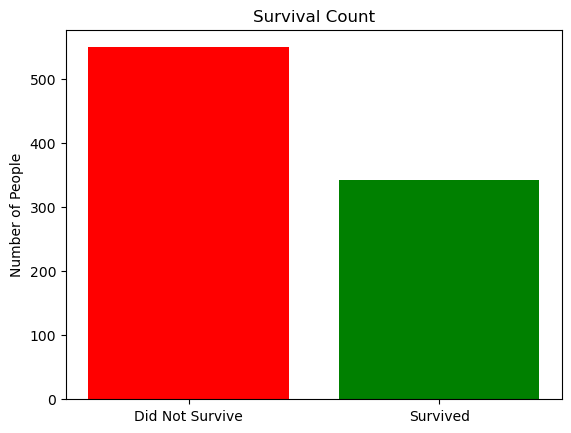

In [15]:
survivors = df['survived'].value_counts()
plt.bar(['Did Not Survive', 'Survived'], survivors, color=['red', 'green'])
plt.title("Survival Count")
plt.ylabel("Number of People")
plt.show()


### Histogram of Age

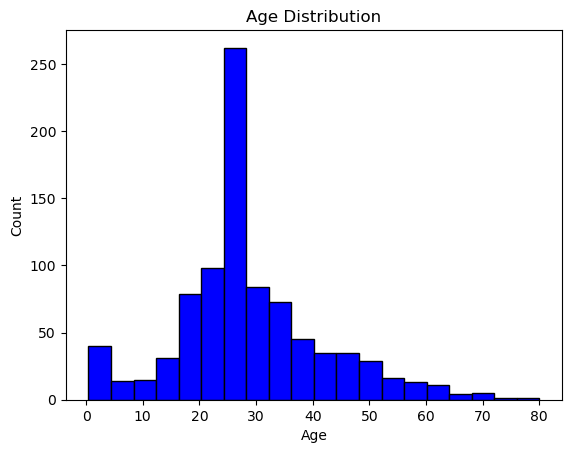

In [20]:
plt.hist(df['age'], bins=20, color='blue', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### Pie chart of Gender Distribution

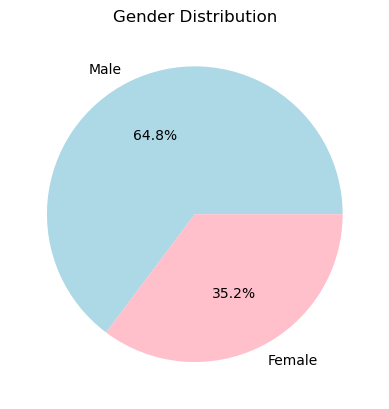

In [23]:
gender_counts = df['sex'].value_counts()
plt.pie(gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title("Gender Distribution")
plt.show()

# SEABORN PLOTS

### Violin Plot of Age Distribution by Class

C:\Users\aswat\AppData\Local\Temp\ipykernel_19124\2725192815.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='class', y='age', data=df, palette="coolwarm")


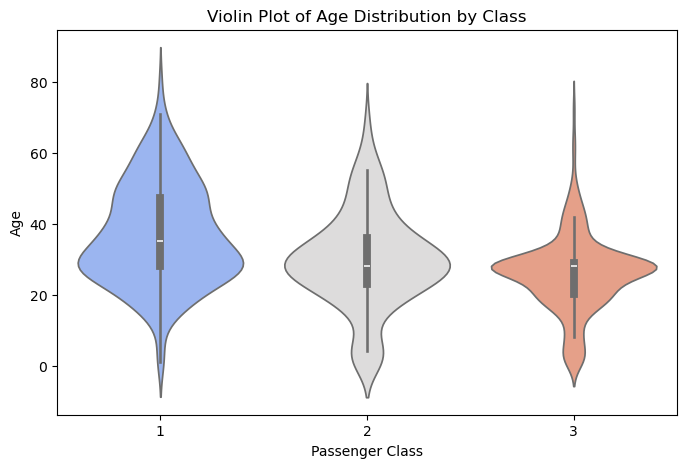

In [41]:
plt.figure(figsize=(8,5))
sns.violinplot(x='class', y='age', data=df, palette="coolwarm")
plt.title("Violin Plot of Age Distribution by Class")
plt.xlabel("Passenger Class")
plt.ylabel("Age")
plt.show()

### Count plot of survivors by class

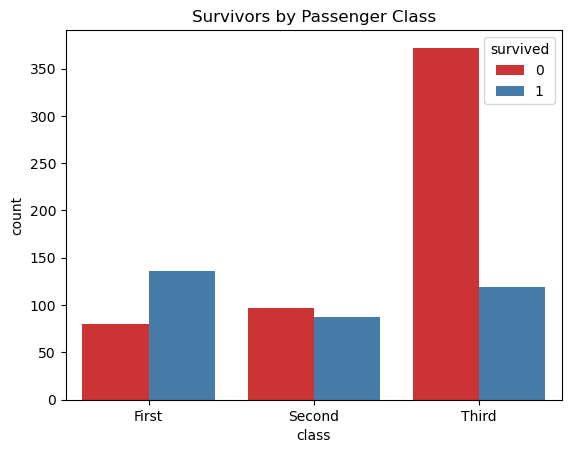

In [30]:
sns.countplot(x="class", hue="survived", data=df, palette="Set1")
plt.title("Survivors by Passenger Class")
plt.show()

### Strip Plot of Fare by Class

C:\Users\aswat\AppData\Local\Temp\ipykernel_19124\270490596.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='class', y='fare', data=df, jitter=True, palette="Set1")


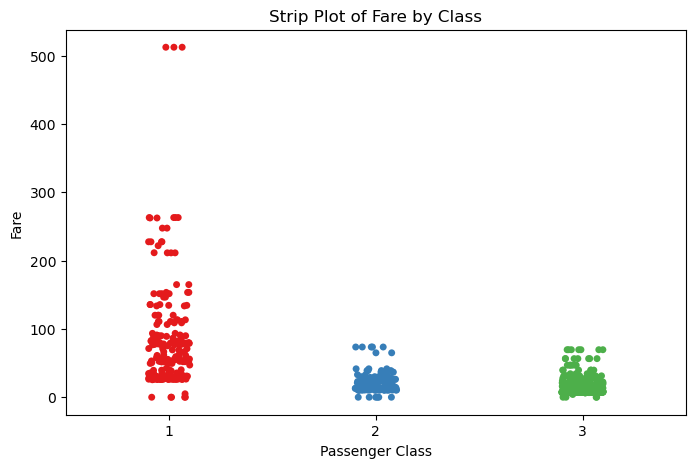

In [45]:
plt.figure(figsize=(8,5))
sns.stripplot(x='class', y='fare', data=df, jitter=True, palette="Set1")
plt.title("Strip Plot of Fare by Class")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.show()